In [82]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "mouse_drug_data.csv"
clinical_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data, encoding="ISO-8859-1")
clinical_df = pd.read_csv(clinical_data, encoding="ISO-8859-1")

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [83]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group = merge_df.groupby(['Drug','Timepoint'])

volume_mean = group["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
volume_mean_df = pd.DataFrame({"Volume Mean": volume_mean})
# Preview DataFrame
volume_mean_df.head()

Volume Mean
Drug      Timepoint             
Capomulin 0            45.000000
          5            44.266086
          10           43.084291
          15           42.064317
          20           40.716325

In [84]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
volume_ste = group["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
volume_ste_df = pd.DataFrame(volume_ste)
# Preview DataFrame
volume_ste_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [85]:
# Minor Data Munging to Re-Format the Data Frames
volume_pivot = volume_mean_df.pivot_table(index='Timepoint',
                                 columns='Drug',
                                 values="Volume Mean")
# Preview that Reformatting worked
volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


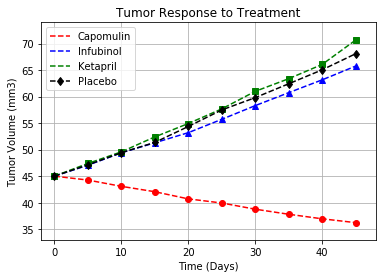

In [121]:
tumor_drop= merge_df.drop(["Mouse ID", "Metastatic Sites"], axis =1)
tumor_group= tumor_drop.groupby(["Drug", "Timepoint"]).mean()
tumor_group= tumor_group.reset_index()

tumor_SE_grouped= tumor_drop.groupby(["Drug", "Timepoint"]).sem()
tumor_SE_grouped= tumor_SE_grouped.reset_index()

Placebo=tumor_group.loc[tumor_group["Drug"]=="Placebo"]
Capomulin=tumor_group.loc[tumor_group["Drug"]=="Capomulin"]
Infubinol=tumor_group.loc[tumor_group["Drug"]=="Infubinol"]
Ketapril=tumor_group.loc[tumor_group["Drug"]=="Ketapril"]

fig, ax = plt.subplots()
Capomulin.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color='red', style="-o",linestyle='dashed',
                          label='Capomulin', ax=ax)
Infubinol.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color='blue', style="-^", linestyle='dashed',
                          label='Infubinol', ax=ax)
Ketapril.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color='green', style="-s",linestyle='dashed',
                          label='Ketapril', ax=ax)
Placebo_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color='black', style="-d",linestyle='dashed',
                          label='Placebo', ax=ax)                    


ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title('Tumor Response to Treatment')
ax.set_xlim(-2,48)
ax.set_ylim(33,74)
ax.grid(True)
plt.show()

In [106]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = group["Metastatic Sites"].mean()
# Convert to DataFrame
meta_mean_df = pd.DataFrame({"Meta Mean": meta_mean})
# Preview DataFrame
meta_mean_df.head()

Meta Mean
Drug      Timepoint           
Capomulin 0           0.000000
          5           0.160000
          10          0.320000
          15          0.375000
          20          0.652174

In [107]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_group = merge_df.groupby(['Drug','Timepoint'])

meta_ste = meta_group["Metastatic Sites"].sem()
# Convert to DataFrame
meta_ste_df = pd.DataFrame(meta_ste)
# Preview DataFrame
meta_ste_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [108]:
# Minor Data Munging to Re-Format the Data Frames
meta_pivot = meta_mean_df.pivot_table(index='Timepoint',
                                 columns='Drug',
                                 values='Meta Mean')
# Preview that Reformatting worked
meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


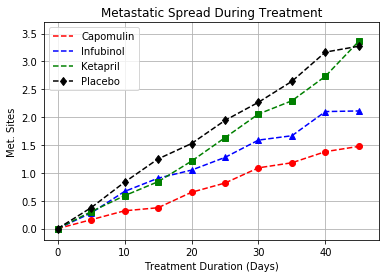

In [122]:
metastic= merge_df.drop(["Mouse ID", "Tumor Volume (mm3)"], axis =1)

metastic_grouped= metastic.groupby(["Drug", "Timepoint"]).mean()
metastic_grouped= metastic_grouped.reset_index()

metastic_ste= metastic.groupby(["Drug", "Timepoint"]).sem()
metastic_ste= metastic_ste.reset_index()

Capomulin=metastic_grouped.loc[metastic_grouped["Drug"]=="Capomulin"]
Infubinol=metastic_grouped.loc[metastic_grouped["Drug"]=="Infubinol"]
Ketapril=metastic_grouped.loc[metastic_grouped["Drug"]=="Ketapril"]
Placebo=metastic_grouped.loc[metastic_grouped["Drug"]=="Placebo"]

fig2, ax = plt.subplots()
Capomulin.plot.line(x='Timepoint', y='Metastatic Sites', color='red', style="-o",
                        linestyle='dashed', label='Capomulin', ax=ax)                     
Infubinol.plot.line(x='Timepoint', y='Metastatic Sites', color='blue', style="-^",
                        linestyle='dashed', label='Infubinol', ax=ax)
Ketapril.plot.line(x='Timepoint', y='Metastatic Sites', color='green', style="-s",
                        linestyle='dashed', label='Ketapril', ax=ax)
Placebo.plot.line(x='Timepoint', y='Metastatic Sites', color='black', style="-d",
                        linestyle='dashed', label='Placebo', ax=ax)

ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Met. Sites')
ax.set_title('Metastatic Spread During Treatment')
ax.set_xlim(-2,48)
ax.set_ylim(-0.2,3.7)
ax.grid(True,)
plt.show()

In [91]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group = merge_df.groupby(['Drug','Timepoint'])

mice_count = group["Mouse ID"].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})
# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [229]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mice_count_df.pivot_table(index='Timepoint',
                                 columns='Drug',
                                 values='Mouse Count')
# Preview that Reformatting worked
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


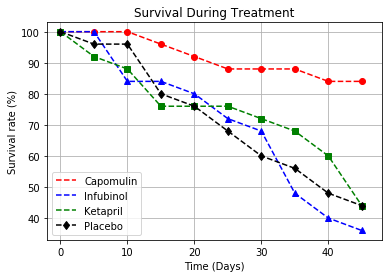

In [123]:
survival= merge_df.drop(["Mouse ID", "Tumor Volume (mm3)"], axis =1)

survival_group= survival.groupby(["Drug", "Timepoint"]).count()/25*100
survival_group= survival_group.reset_index()

Placebo=survival_group.loc[metastic_grouped["Drug"]=="Placebo"]
Capomulin=survival_group.loc[survival_group["Drug"]=="Capomulin"]
Infubinol=survival_group.loc[survival_group["Drug"]=="Infubinol"]
Ketapril=survival_group.loc[survival_group["Drug"]=="Ketapril"]

fig3, ax = plt.subplots()
Capomulin.plot.line(x='Timepoint', y='Metastatic Sites', style= "-o", color='red', 
                    linestyle='dashed', label='Capomulin', ax=ax)                     
Infubinol.plot.line(x='Timepoint', y='Metastatic Sites', style= "-^", color='blue', 
                    linestyle='dashed', label='Infubinol', ax=ax)
Ketapril.plot.line(x='Timepoint', y='Metastatic Sites', style= "-s", color='green', 
                    linestyle='dashed', label='Ketapril', ax=ax)
Placebo.plot.line(x='Timepoint', y='Metastatic Sites', style= "-d", color='black', 
                    linestyle='dashed', label='Placebo', ax=ax)

ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival rate (%)')
ax.set_title('Survival During Treatment')
ax.set_xlim(-2,48)
ax.set_ylim(33,103)
ax.grid(True)
plt.show()

In [237]:
# Calculate the percent changes for each drug
capo_change = (volume_pivot.loc[0,'Capomulin'] - volume_pivot.loc[45,'Capomulin'])/volume_pivot.loc[0,'Capomulin']*-100
ceft_change = (volume_pivot.loc[0,'Ceftamin'] - volume_pivot.loc[45,'Ceftamin'])/volume_pivot.loc[0,'Ceftamin']*-100
infu_change = (volume_pivot.loc[0,'Infubinol'] - volume_pivot.loc[45,'Infubinol'])/volume_pivot.loc[0,'Infubinol']*-100
keta_change = (volume_pivot.loc[0,'Ketapril'] - volume_pivot.loc[45,'Ketapril'])/volume_pivot.loc[0,'Ketapril']*-100
naft_change = (volume_pivot.loc[0,'Naftisol'] - volume_pivot.loc[45,'Naftisol'])/volume_pivot.loc[0,'Naftisol']*-100
plac_change = (volume_pivot.loc[0,'Placebo'] - volume_pivot.loc[45,'Placebo'])/volume_pivot.loc[0,'Placebo']*-100
prop_change = (volume_pivot.loc[0,'Propriva'] - volume_pivot.loc[45,'Propriva'])/volume_pivot.loc[0,'Propriva']*-100
rami_change = (volume_pivot.loc[0,'Ramicane'] - volume_pivot.loc[45,'Ramicane'])/volume_pivot.loc[0,'Ramicane']*-100
stel_change = (volume_pivot.loc[0,'Stelasyn'] - volume_pivot.loc[45,'Stelasyn'])/volume_pivot.loc[0,'Stelasyn']*-100
zoni_change = (volume_pivot.loc[0,'Zoniferol'] - volume_pivot.loc[45,'Zoniferol'])/volume_pivot.loc[0,'Zoniferol']*-100

print("Drug")
print("Capomulin    {0:.6f} ".format(capo_change))
print("Ceftamin      {0:.6f} ".format(ceft_change))
print("Infubitol     {0:.6f} ".format(infu_change))
print("Ketapril      {0:.6f} ".format(keta_change))
print("Naftisol      {0:.6f} ".format(naft_change))
print("Placebo       {0:.6f} ".format(plac_change))
print("Propriva      {0:.6f} ".format(prop_change))
print("Ramicane     {0:.6f} ".format(rami_change))
print("Stelasyn      {0:.6f} ".format(stel_change))
print("Zoniferol     {0:.6f} ".format(zoni_change))

Drug
Capomulin    -19.475303 
Ceftamin      42.516492 
Infubitol     46.123472 
Ketapril      57.028795 
Naftisol      53.923347 
Placebo       51.297960 
Propriva      47.241175 
Ramicane     -22.320900 
Stelasyn      52.085134 
Zoniferol     46.579751 


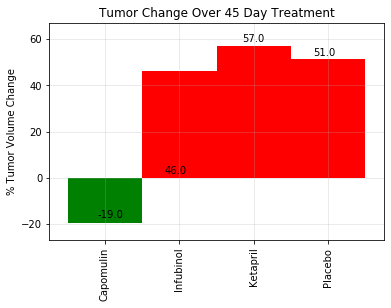

In [220]:
initial_volume=tumor_group.loc[tumor_group['Timepoint'] ==0, ['Drug', 'Tumor Volume (mm3)']]
final_volume=tumor_group.loc[tumor_group['Timepoint'] ==45, ['Drug', 'Tumor Volume (mm3)']]

initial=initial_volume.set_index('Drug')
final=final_volume.set_index('Drug') 
change=((final-initial)/initial)*100

four_changes=change.loc[['Capomulin', 'Infubinol', 'Ketapril','Placebo']]

percentages= round(four_changes["Tumor Volume (mm3)"])

four_changes.plot(kind="bar", legend=False, width=1, label= percentages, color="grrr")

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("")
plt.ylabel("% Tumor Volume Change")
plt.ylim (-27, 67)

plt.text(0.8, 0+2, percentages[1])
plt.text(1.85, percentages[2]+2, percentages[2])
plt.text(2.8, percentages[3]+2, percentages[3])
plt.text(-0.095, percentages[0]+2, percentages[0])
plt.grid(True, alpha=.3)    
plt.show()